This file will take more than 2 hour to Run.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("Model_Features.csv")
df.head(5)

,Mileage,Model,Levy,Prod. year,Manufacturer,Engine volume,Airbags,Color,Category,Fuel type,Gear box type,Leather interior,Price
0,186005,RX 450,1399.000000,2010,LEXUS,3.5,12,Silver,Jeep,Hybrid,Automatic,True,13328
1,192000,Equinox,1018.000000,2011,CHEVROLET,3.0,8,Black,Jeep,Petrol,Tiptronic,False,16621
2,200000,FIT,803.857398,2006,HONDA,1.3,2,Black,Hatchback,Petrol,Variator,False,8467
3,168966,Escape,862.000000,2011,FORD,2.5,0,White,Jeep,Hybrid,Automatic,True,3607
4,91901,FIT,446.000000,2014,HONDA,1.3,4,Silver,Hatchback,Petrol,Automatic,True,11726


## **2.3 Normalization AND one-hot-encoding**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16728 entries, 0 to 16727
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mileage           16728 non-null  int64  
 1   Model             16728 non-null  object 
 2   Levy              16728 non-null  float64
 3   Prod. year        16728 non-null  int64  
 4   Manufacturer      16728 non-null  object 
 5   Engine volume     16728 non-null  float64
 6   Airbags           16728 non-null  int64  
 7   Color             16728 non-null  object 
 8   Category          16728 non-null  object 
 9   Fuel type         16728 non-null  object 
 10  Gear box type     16728 non-null  object 
 11  Leather interior  16728 non-null  bool   
 12  Price             16728 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 1.5+ MB


In [7]:
num_attribs = ['Levy','Prod. year', 'Engine volume','Doors', 'Mileage', 'Cylinders', 'Airbags']
cat_attribs = ['Manufacturer','Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo Engine']
num_attribs = [x for x in num_attribs if x in df.columns]
cat_attribs = [x for x in cat_attribs if x in df.columns]
print(num_attribs, cat_attribs)

['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Airbags'] ['Manufacturer', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Color']


In [8]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())])

In [9]:
df = df.reset_index()
full_pipeline = ColumnTransformer([
    ('num',num_pipeline, num_attribs),
    ('cat',OneHotEncoder(), cat_attribs)  
])
df1 = full_pipeline.fit_transform(df)

In [10]:
df1

<16728x88 sparse matrix of type '<class 'numpy.float64'>'
	with 184008 stored elements in Compressed Sparse Row format>

In [11]:
df1.shape

(16728, 88)

## **3 Model building**

In [12]:
ml_models = pd.DataFrame(columns=['Algorithm', 'rmse_train', 'rmse_test'])
ml_models.head()

,Algorithm,rmse_train,rmse_test


linear regression

In [13]:
Y = df['Price']

In [14]:
lin_rmse_train = []
lin_rmse_test = []
kf = KFold(n_splits=10, shuffle=True, random_state=1)
lin_reg = LinearRegression()
for train_index, test_index in kf.split(df1):
    X_train, X_test = df1[train_index], df1[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lin_reg.fit(X_train, y_train)
    predictions = lin_reg.predict(X_train)
    lin_mse_train = mean_squared_error(y_train, predictions)
    lin_rmse_train.append(np.sqrt(lin_mse_train))
    predictions = lin_reg.predict(X_test)
    lin_mse_test = mean_squared_error(y_test, predictions)
    lin_rmse_test.append(np.sqrt(lin_mse_test))
print(lin_rmse_test)
min_idx = lin_rmse_test.index(min(lin_rmse_test))
ml_models = ml_models.append({'Algorithm':'Linear Regression', 'rmse_train':lin_rmse_train[min_idx], 'rmse_test':min(lin_rmse_test)}, ignore_index=True)
ml_models.head()

[8829.353341805225, 9197.263863361119, 9010.118115590985, 9076.991437166413, 9298.267054126916, 9520.697296445636, 9171.126266765325, 9335.070920502096, 9468.949824142273, 8901.378643218903]


,Algorithm,rmse_train,rmse_test
0,Linear Regression,9179.423772,8829.353342


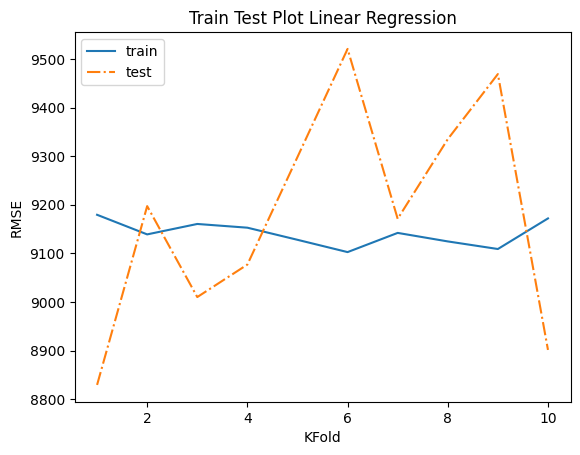

In [15]:
x_lst = np.arange(1,11,1)
plt.plot(x_lst, lin_rmse_train, label="train")
plt.plot(x_lst, lin_rmse_test, '-.', label="test")
plt.xlabel("KFold")
plt.ylabel("RMSE")
plt.legend(loc="upper left")
plt.title('Train Test Plot Linear Regression')
plt.show()

knn

In [16]:
#running this cell takes > 15 min

kf = KFold(n_splits=10, shuffle=True, random_state=1)
lst_knn_rmse_train = []
lst_knn_rmse_test = []
for x in range(1, 20, 2):
    knn_rmse_train = []
    knn_rmse_test = []
    knn = KNeighborsClassifier(n_neighbors=x)
    for train_index, test_index in kf.split(df1):
        X_train, X_test = df1[train_index], df1[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        knn.fit(X_train, y_train)
        tree_predictions_train = knn.predict(X_train)
        knn_mse_train = mean_squared_error(y_train, tree_predictions_train)
        knn_rmse_train.append(np.sqrt(knn_mse_train))
        tree_predictions_test = knn.predict(X_test)
        knn_mse_test = mean_squared_error(y_test, tree_predictions_test)
        knn_rmse_test.append(np.sqrt(knn_mse_test))
    print(f'neighbours: {x}')
    print(knn_rmse_test)
    lst_knn_rmse_train.append(knn_rmse_train)
    lst_knn_rmse_test.append(knn_rmse_test)

neighbours: 1
[7154.800503136979, 7714.5431641749665, 7124.454780661995, 7625.564470968467, 7433.302101334717, 8313.741414431715, 7637.560160132381, 7723.157413322762, 8011.769352626734, 7262.088436155639]
neighbours: 3
[7921.9999069680125, 8239.506430966689, 8475.781538018497, 8240.860976076307, 8672.24196399111, 8943.535370372269, 8909.456942628563, 8528.095502629676, 8918.344268071942, 8110.096494685501]
neighbours: 5
[8672.915880641516, 9163.111414719644, 9490.557736982364, 9206.416450472669, 9552.479542477131, 9731.002198929811, 9665.878946888357, 9585.430348093872, 10029.628140780918, 9131.711327715482]
neighbours: 7
[9228.302975559853, 9546.878383800367, 9781.456218433843, 9720.446993269084, 9968.784371636139, 9688.587787937242, 10269.966986731142, 9727.092217654725, 10327.84266563914, 9521.112305036613]
neighbours: 9
[9333.198230787895, 9576.173358210017, 10006.268280352378, 9796.235207846923, 10042.26500689059, 9880.279274289556, 10172.072484151557, 9962.616626920411, 10374.39

In [17]:
mean_tree_rmse_train = [np.mean(x) for x in lst_knn_rmse_train]
mean_tree_rmse_test = [np.mean(x) for x in lst_knn_rmse_test]
min_idx = mean_tree_rmse_test.index(min(mean_tree_rmse_test))
ml_models = ml_models.append({'Algorithm':'KNN', 'rmse_train':mean_tree_rmse_train[min_idx], 'rmse_test':min(mean_tree_rmse_test)}, ignore_index=True)
print(f"Minimum rmse: {min(mean_tree_rmse_test)} || no-neighbour: {min_idx + min_idx + 1}")

Minimum rmse: 7600.098179694636 || no-neighbour: 1


In [18]:
ml_models.head()

,Algorithm,rmse_train,rmse_test
0,Linear Regression,9179.423772,8829.353342
1,KNN,1080.788623,7600.098180


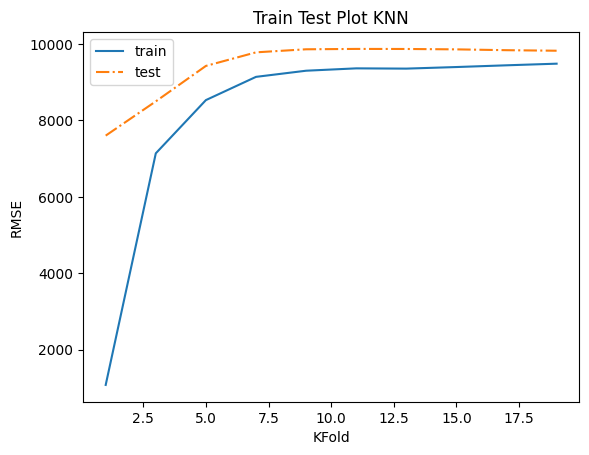

In [19]:
x_lst = np.arange(1,20,2)
plt.plot(x_lst, mean_tree_rmse_train, label='train')
plt.plot(x_lst, mean_tree_rmse_test, '-.', label='test')
plt.xlabel("KFold")
plt.ylabel("RMSE")
plt.legend(loc="upper left")
plt.title('Train Test Plot KNN')
plt.show()

ADA boost classifier

In [20]:
#running this cell takes > 15 min

kf = KFold(n_splits=10, shuffle=True, random_state=1)
lst_ada_rmse_train = []
lst_ada_rmse_test = []
for x in range(1, 20, 2):
    ada_rmse_train = []
    ada_rmse_test = []
    classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=x, criterion='entropy'),
    n_estimators=4
    )
    for train_index, test_index in kf.split(df1):
        X_train, X_test = df1[train_index], df1[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        classifier.fit(X_train, y_train)
        ada_predictions_train = classifier.predict(X_train)
        ada_mse_train = mean_squared_error(y_train, ada_predictions_train)
        ada_rmse_train.append(np.sqrt(ada_mse_train))
        ada_predictions_test = classifier.predict(X_test)
        ada_mse_test = mean_squared_error(y_test, ada_predictions_test)
        ada_rmse_test.append(np.sqrt(ada_mse_test))
    print(f'max_depth: {x}')
    print(ada_rmse_test)
    lst_ada_rmse_train.append(ada_rmse_train)
    lst_ada_rmse_test.append(ada_rmse_test)

max_depth: 1
[13587.901304254245, 13569.194064103904, 14264.569589295086, 16286.625758729197, 13510.283913205576, 16402.794585933592, 13512.709916943457, 15839.315313300076, 17571.138123756093, 13725.459806793167]
max_depth: 3
[11806.065708729071, 11830.404635379979, 11786.819140492798, 11173.320047347353, 11830.714817484526, 12025.491959272287, 12112.929372281671, 11258.90520002049, 11921.07787002224, 11681.845340519134]
max_depth: 5
[11306.081710942693, 11009.811486366681, 11365.76532235385, 10950.947982802958, 11307.014322059507, 11851.604418612611, 11352.000406304871, 11228.365325737524, 11904.0146790261, 12070.548676125014]
max_depth: 7
[8280.65541385972, 9208.752540072499, 8335.252114609755, 9275.89496702774, 9427.401338524263, 8908.282088689584, 8872.292747184989, 9284.148355009429, 9655.145689180781, 8453.18344912975]
max_depth: 9
[7231.561976285341, 7693.277845053788, 7497.0024828417, 7787.504246951913, 8163.952966037936, 8051.281150981243, 8101.461381862972, 8110.398349411248

In [21]:
mean_ada_rmse_train = [np.mean(x) for x in lst_ada_rmse_train]
mean_ada_rmse_test = [np.mean(x) for x in lst_ada_rmse_test]
min_idx = mean_ada_rmse_test.index(min(mean_ada_rmse_test))
ml_models = ml_models.append({'Algorithm':'Ada Boost Tree', 'rmse_train':mean_ada_rmse_train[min_idx], 'rmse_test':min(mean_ada_rmse_test)}, ignore_index=True)
print(f"Minimum rmse: {min(mean_ada_rmse_test)} || max_depth: {min_idx + min_idx + 1}")

Minimum rmse: 7675.715150741121 || max_depth: 11


In [22]:
ml_models.head()

,Algorithm,rmse_train,rmse_test
0,Linear Regression,9179.423772,8829.353342
1,KNN,1080.788623,7600.098180
2,Ada Boost Tree,2559.642746,7675.715151


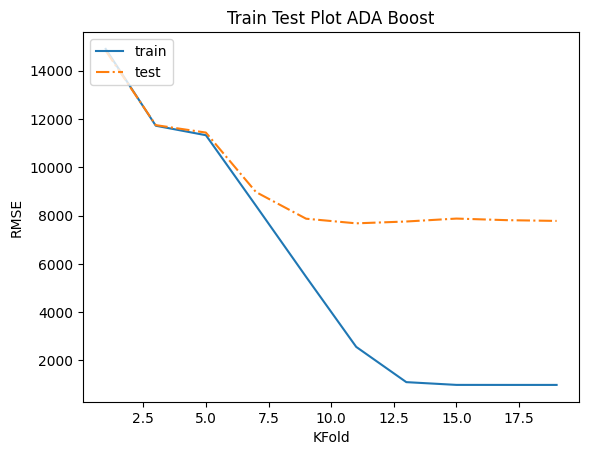

In [23]:
x_lst = np.arange(1,20,2)
plt.plot(x_lst, mean_ada_rmse_train, label = 'train')
plt.plot(x_lst, mean_ada_rmse_test, '-.', label = 'test')
plt.xlabel("KFold")
plt.ylabel("RMSE")
plt.legend(loc="upper left")
plt.title('Train Test Plot ADA Boost')
plt.show()

Support vector Regression

In [24]:
#running this cell takes > 15 min

svr_rmse_train = []
svr_rmse_test = []
kf = KFold(n_splits=10, shuffle=True, random_state=1)
svr = SVR()
for train_index, test_index in kf.split(df1):
    X_train, X_test = df1[train_index], df1[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    svr.fit(X_train, y_train)
    predictions_train = svr.predict(X_train)
    svr_mse_train = mean_squared_error(y_train, predictions_train)
    svr_rmse_train.append(np.sqrt(svr_mse_train))
    predictions_test = svr.predict(X_test)
    svr_mse_test = mean_squared_error(y_test, predictions_test)
    svr_rmse_test.append(np.sqrt(svr_mse_test))
print(svr_rmse_test)
min_idx = svr_rmse_test.index(min(svr_rmse_test))
ml_models = ml_models.append({'Algorithm':'SVR', 'rmse_train':svr_rmse_train[min_idx], 'rmse_test':min(svr_rmse_test)}, ignore_index=True)
ml_models.head()

[11026.138915536067, 11324.048006893672, 11370.519050693156, 11164.788998724756, 11404.316141982736, 11839.609188024762, 11410.040314427768, 11499.269141371464, 11487.22117365352, 10917.628010204317]


,Algorithm,rmse_train,rmse_test
0,Linear Regression,9179.423772,8829.353342
1,KNN,1080.788623,7600.098180
2,Ada Boost Tree,2559.642746,7675.715151
3,SVR,11382.448951,10917.628010


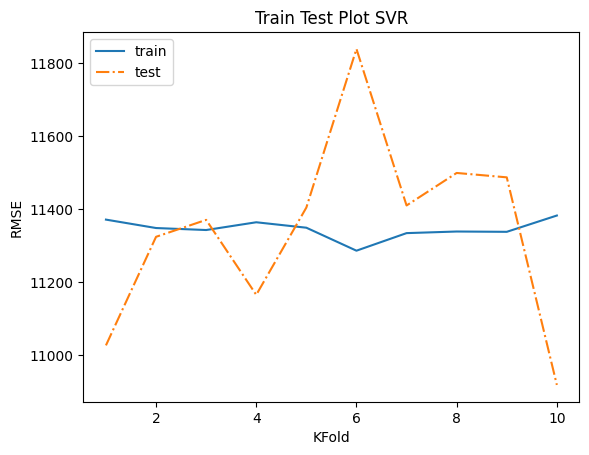

In [25]:
x_lst = np.arange(1,11,1)
plt.plot(x_lst, svr_rmse_train, label='train')
plt.plot(x_lst, svr_rmse_test, '-.', label='test')
plt.xlabel("KFold")
plt.ylabel("RMSE")
plt.legend(loc="upper left")
plt.title('Train Test Plot SVR')
plt.show()

Random Forest Regressor

In [26]:
#running this cell takes > 15 min

lst_rf_rmse_train = []
lst_rf_rmse_test = []
for x in range(1, 60, 3):
    rf_rmse_train = []
    rf_rmse_test = []
    rfr = RandomForestRegressor(max_depth=x)
    for train_index, test_index in kf.split(df1):
        X_train, X_test = df1[train_index], df1[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        rfr.fit(X_train, y_train)
        rf_predictions_train = rfr.predict(X_train)
        rf_mse_train = mean_squared_error(y_train, rf_predictions_train)
        rf_rmse_train.append(np.sqrt(rf_mse_train))
        rf_predictions_test = rfr.predict(X_test)
        rf_mse_test = mean_squared_error(y_test, rf_predictions_test)
        rf_rmse_test.append(np.sqrt(rf_mse_test))
    print(f'max_depth: {x}')
    print(rf_rmse_test)
    lst_rf_rmse_train.append(rf_rmse_train)
    lst_rf_rmse_test.append(rf_rmse_test)

max_depth: 1
[10771.751849717304, 10841.317973112626, 10924.517393842234, 10786.00309206863, 11005.407170460632, 11323.00913241403, 10956.341746405958, 11019.89558030792, 11137.871490420364, 10651.643245942154]
max_depth: 4
[8443.774831393077, 8540.041982539593, 8540.686672069744, 8576.941362467414, 8554.956680996185, 8586.614244111, 8576.271177064664, 8773.403070376904, 9043.029826358896, 8228.527032836642]
max_depth: 7
[6920.2925194461595, 7124.607325012597, 6914.632591280206, 7285.867469401908, 7173.852087660723, 7090.906576828431, 7101.787580740987, 7297.304946348026, 7433.371040315256, 6718.483437950977]
max_depth: 10
[5972.145526415012, 6465.179390069959, 6286.49917558165, 6686.5457097067665, 6538.199668158811, 6587.861842437884, 6536.295623196408, 6613.600015763431, 6689.196854211008, 6041.568025263273]
max_depth: 13
[5505.335812168099, 5996.884943102545, 5842.895875571386, 6278.75416083541, 6186.410644940642, 6276.307646216404, 6195.306290029279, 6148.013481818574, 6269.0429389

In [27]:
mean_rf_rmse_train = [np.mean(x) for x in lst_rf_rmse_train]
mean_rf_rmse_test = [np.mean(x) for x in lst_rf_rmse_test]
min_idx = mean_rf_rmse_test.index(min(mean_rf_rmse_test))
ml_models = ml_models.append({'Algorithm':'Random Forest Regressor', 'rmse_train':mean_rf_rmse_train[min_idx], 'rmse_test':min(mean_rf_rmse_test)}, ignore_index=True)
print(f"Minimum rmse: {min(mean_rf_rmse_test)} || max_depth: {1 + min_idx * 3}")

Minimum rmse: 5622.258558123991 || max_depth: 58


In [28]:
ml_models

,Algorithm,rmse_train,rmse_test
0,Linear Regression,9179.423772,8829.353342
1,KNN,1080.788623,7600.098180
2,Ada Boost Tree,2559.642746,7675.715151
3,SVR,11382.448951,10917.628010
4,Random Forest Regressor,2205.456958,5622.258558


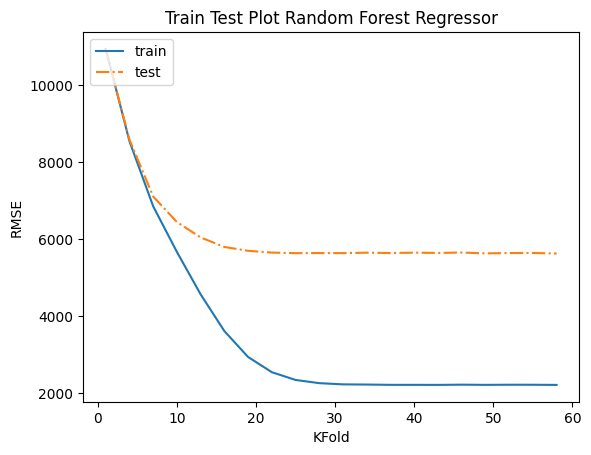

In [29]:
x_lst = np.arange(1,60,3)
plt.plot(x_lst, mean_rf_rmse_train, label='train')
plt.plot(x_lst, mean_rf_rmse_test, '-.', label='test')
plt.xlabel("KFold")
plt.ylabel("RMSE")
plt.legend(loc="upper left")
plt.title('Train Test Plot Random Forest Regressor')
plt.show()

**Hyper-parameter Optimization**

We select random forest regressor as the rmse for it is the lowest compared to other algorithms, but it is slightly over fitting on data we use GridCV to find the optimal parameters for the algorithms.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df1, Y, test_size=0.33, random_state=1)

In [31]:
grid = { 
    'n_neighbors': [200,300,400,500],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
rf_cv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)
rf_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 300, 'weights': 'distance'}

In [32]:
knn = KNeighborsClassifier(n_neighbors=300, weights='distance', algorithm='auto')
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_train)
knn_mse = mean_squared_error(y_train, knn_predictions)
knn_train_rmse = np.sqrt(knn_mse)
knn_predictions = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_test_rmse = np.sqrt(knn_mse)
print(f'Train RMSE: {knn_train_rmse} || Test RMSE: {knn_test_rmse}')

Train RMSE: 958.7146311129585 || Test RMSE: 9606.01463793569


In [33]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'random_state' : [18]
}
rf_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)
rf_cv.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 18}

In [34]:
rfr = RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=500, random_state=18)
rfr.fit(X_train, y_train)
forest_predictions = rfr.predict(X_train)
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_train_rmse = np.sqrt(forest_mse)
forest_predictions = rfr.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_test_rmse = np.sqrt(forest_mse)
print(f'Train RMSE: {forest_train_rmse} || Test RMSE: {forest_test_rmse}')

Train RMSE: 8035.985625349999 || Test RMSE: 8141.879769237276


In [35]:
import joblib
joblib.dump(rfr, 'RFR_model.joblib')


['RFR_model.joblib']

Note: Due to limited computing power, grid search was not performed on all features.

Outcome: The Linear Regression Model demonstrated good model generalization, achieving an RMSE of 8829.33 on the test data. KNN exhibited overfitting, with a significantly lower training RMSE compared to testing RMSE. Similarly, Decision Tree also showed signs of overfitting. SVR demonstrated good generalization with a similar RMSE on both the testing and training data. Random Forest Regressor slightly overfitted the data, but we used GridCV to identify optimal parameters and trained the model on these parameters, resulting in a better generalization with a lower RMSE compared to other algorithms.

Considering the lower RMSE and better generalization on data, we chose Random Forest Regressor as our model algorithm, after grid search on its optimal parameters.